In [ ]:
!pip install --upgrade --force-reinstall pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

In [ ]:
# Run before running any model below (seperated models into 3 code blocks)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load Data
df = pd.read_csv('diabetic_dataset_v1_label_encoded.csv')

# Fill missing categorical values
df[['max_glu_serum', 'A1Cresult']] = df[['max_glu_serum', 'A1Cresult']].apply(lambda x: x.fillna(x.mode()[0]))

categorical_columns = [
    'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
    'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed'
]
df[categorical_columns] = df[categorical_columns].astype(str)

numerical_columns = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

X = df.drop(columns=['readmitted'])
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ]
)


In [ ]:
# XGBoost model
from xgboost import XGBClassifier # import XGBClassifier from xgboost library
from sklearn.pipeline import Pipeline # Import Pipeline from sklearn.pipeline
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for target variable encoding

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training target variable and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform your test target variable using the trained encoder
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Train using the encoded target variable
xgb_pipeline.fit(X_train, y_train_encoded)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate
# Assuming classification_report, accuracy_score, f1_score, recall_score are defined and imported.
# Use label_encoder.classes_ to get the original class names for the report
from sklearn.metrics import classification_report, accuracy_score, f1_score , recall_score # Import necessary metrics

print("XGBoost Classification Report:")
#print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_)) # Use original class names
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
#print("F1 Score:", f1_score(y_pred_xgb, average='macro'))
#print("Recall Score:", recall_score(y_pred_xgb, average='macro'))
print("F1 Score:", f1_score(y_test_encoded, y_pred_xgb, average='macro')) # Added y_test_encoded as the first argument
print("Recall Score:", recall_score(y_test_encoded, y_pred_xgb, average='macro')) # Added y_test_encoded as the first argument

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:08:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
Accuracy: 0.888375749238479
F1 Score: 0.4882064663455239
Recall Score: 0.508058065732567


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:05:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Recall: 0.8886214011987815
XGBoost F1 Score: 0.8375407359322201


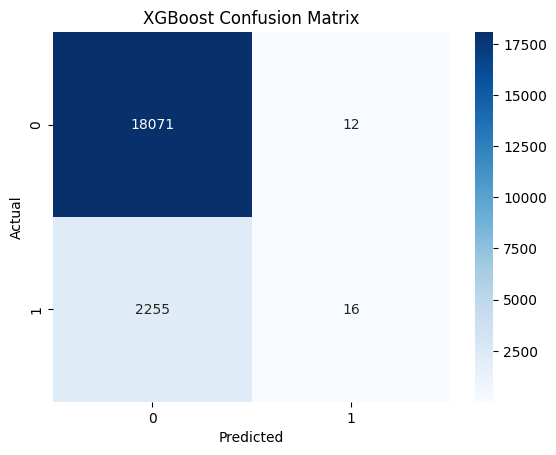

In [ ]:
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Updated pipeline with XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# Hyperparameter tuning space for XGBoost
param_dist_xgb = {
    "classifier__n_estimators": randint(100, 500),
    "classifier__max_depth": randint(3, 10),
    "classifier__learning_rate": uniform(0.01, 0.3),
    "classifier__subsample": uniform(0.5, 0.5),
    "classifier__colsample_bytree": uniform(0.5, 0.5)
}

# Stratified cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Randomized SearchCV
search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
search_xgb.fit(X_train, y_train)
best_xgb = search_xgb.best_estimator_

# Predict
y_pred_xgb = best_xgb.predict(X_test)

# Metrics
print("XGBoost Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:31:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Recall: 0.8886214011987815
XGBoost F1 Score: 0.8375407359322201


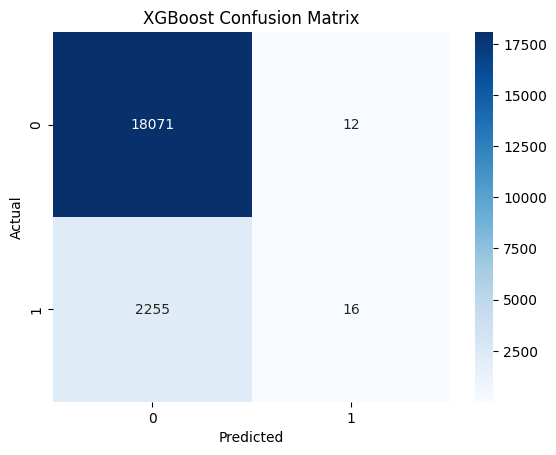

In [ ]:
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for target variable encoding

# Updated pipeline with XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# Hyperparameter tuning space for XGBoost
param_dist_xgb = {
    "classifier__n_estimators": randint(100, 500),
    "classifier__max_depth": randint(3, 10),
    "classifier__learning_rate": uniform(0.01, 0.3),
    "classifier__subsample": uniform(0.5, 0.5),
    "classifier__colsample_bytree": uniform(0.5, 0.5)
}

# Stratified cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Randomized SearchCV
search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training target variable and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform your test target variable using the trained encoder
y_test_encoded = label_encoder.transform(y_test)

# Fit model using the encoded target variable
search_xgb.fit(X_train, y_train_encoded) # Use y_train_encoded here
best_xgb = search_xgb.best_estimator_

# Predict
y_pred_xgb = best_xgb.predict(X_test)

# Metrics - Use y_test_encoded for evaluation
print("XGBoost Recall:", recall_score(y_test_encoded, y_pred_xgb, average='weighted')) # Use y_test_encoded
print("XGBoost F1 Score:", f1_score(y_test_encoded, y_pred_xgb, average='weighted')) # Use y_test_encoded

# Confusion Matrix - Use y_test_encoded for confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgb) # Use y_test_encoded
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
!pip install imbalanced-learn

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:16:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Best Hyperparameters:
 {'classifier__colsample_bytree': np.float64(0.8159364365206693), 'classifier__gamma': np.float64(1.015306123673847), 'classifier__learning_rate': np.float64(0.1985707141115962), 'classifier__max_depth': 9, 'classifier__n_estimators': 286, 'classifier__subsample': np.float64(0.8779139732158818)}

 Classification Report:
              precision    recall  f1-score
0              0.891395  0.994470  0.940116
1              0.444444  0.035227  0.065279
accuracy       0.887442  0.887442  0.887442
macro avg      0.667920  0.514848  0.502698
weighted avg   0.841526  0.887442  0.842506

Recall Score (Weighted): 0.8874422717893289
 F1 Score (Weighted): 0.8425055960879776


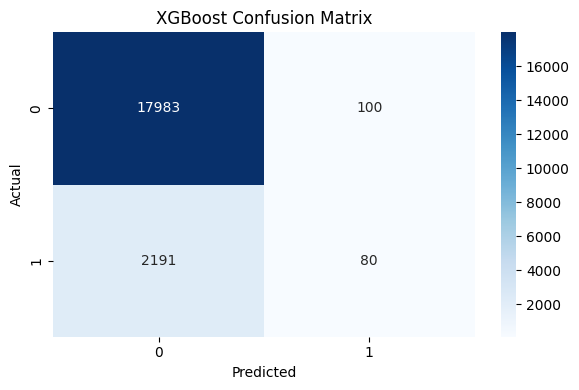

In [ ]:
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix
from scipy.stats import randint, uniform
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# Define parameter search space
param_dist = {
    "classifier__n_estimators": randint(100, 300),
    "classifier__max_depth": randint(3, 10),
    "classifier__learning_rate": uniform(0.01, 0.2),
    "classifier__subsample": uniform(0.6, 0.4),
    "classifier__colsample_bytree": uniform(0.6, 0.4),
    "classifier__gamma": uniform(0, 5)
}

# Cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit model
search.fit(X_train, y_train)
best_model = search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print(" Best Hyperparameters:\n", search.best_params_)
print("\n Classification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
print(pd.DataFrame(report).transpose()[['precision', 'recall', 'f1-score']])

# Optional: print only class-specific scores
print("\nRecall Score (Weighted):", recall_score(y_test, y_pred, average='weighted'))
print(" F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
